Installing the dependencies

In [15]:
!pip install fastapi
!pip install uvicorn
!pip install pickle5
!pip install pydantic
!pip install scikit-learn
!pip install requests
!pip install pypi-json
!pip install pyngrok
!pip install nest-asyncio

In [16]:
from fastapi import FastAPI
from pydantic import BaseModel
import pickle
import json
import uvicorn
from pyngrok import ngrok
from fastapi.middleware.cors import CORSMiddleware
import nest_asyncio

In [17]:
app = FastAPI()

In [18]:
origins = ["*"]

app.add_middleware(
    CORSMiddleware,
    allow_origins=origins,
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

In [19]:
class model_input(BaseModel):

    Pregnancies : int
    Glucose : int
    BloodPressure : int
    SkinThickness : int
    Insulin : int
    BMI : float
    DiabetesPedigreeFunction : float
    Age : int

ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-10' coro=<Server.serve() done, defined at /usr/local/lib/python3.10/dist-packages/uvicorn/server.py:67> exception=KeyboardInterrupt()>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/main.py", line 577, in run
    server.run()
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/server.py", line 65, in run
    return asyncio.run(self.serve(sockets=sockets))
  File "/usr/local/lib/python3.10/dist-packages/nest_asyncio.py", line 30, in run
    return loop.run_until_complete(task)
  File "/usr/local/lib/python3.10/dist-packages/nest_asyncio.py", line 92, in run_until_complete
    self._run_once()
  File "/usr/local/lib/python3.10/dist-packages/nest_asyncio.py", line 133, in _run_once
    handle._run()
  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "/usr/lib/python3.10/asyncio/tasks.py", 

In [20]:
# loading the saved model
diabetes_model = pickle.load(open('/content/trained_diabetes_model.sav', 'rb'))

In [21]:
@app.post('/diabetes_prediction')
def diabetes_predd(input_parameters : model_input):

    input_data = input_parameters.json()
    input_dictionary = json.loads(input_data)

    preg = input_dictionary['Pregnancies']
    glu = input_dictionary['Glucose']
    bp = input_dictionary['BloodPressure']
    skin = input_dictionary['SkinThickness']
    insulin = input_dictionary['Insulin']
    bmi = input_dictionary['BMI']
    dpf = input_dictionary['DiabetesPedigreeFunction']
    age = input_dictionary['Age']


    input_list = [preg, glu, bp, skin, insulin, bmi, dpf, age]

    prediction = diabetes_model.predict([input_list])

    if (prediction[0] == 0):
        return 'The person is not diabetic'
    else:
        return 'The person is diabetic'

In [ ]:
ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)

Public URL: https://b10c-34-41-19-16.ngrok-free.app


INFO:     Started server process [462]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     104.28.208.84:0 - "GET / HTTP/1.1" 404 Not Found
INFO:     104.28.208.84:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     104.28.208.85:0 - "POST /diabetes_prediction HTTP/1.1" 200 OK


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


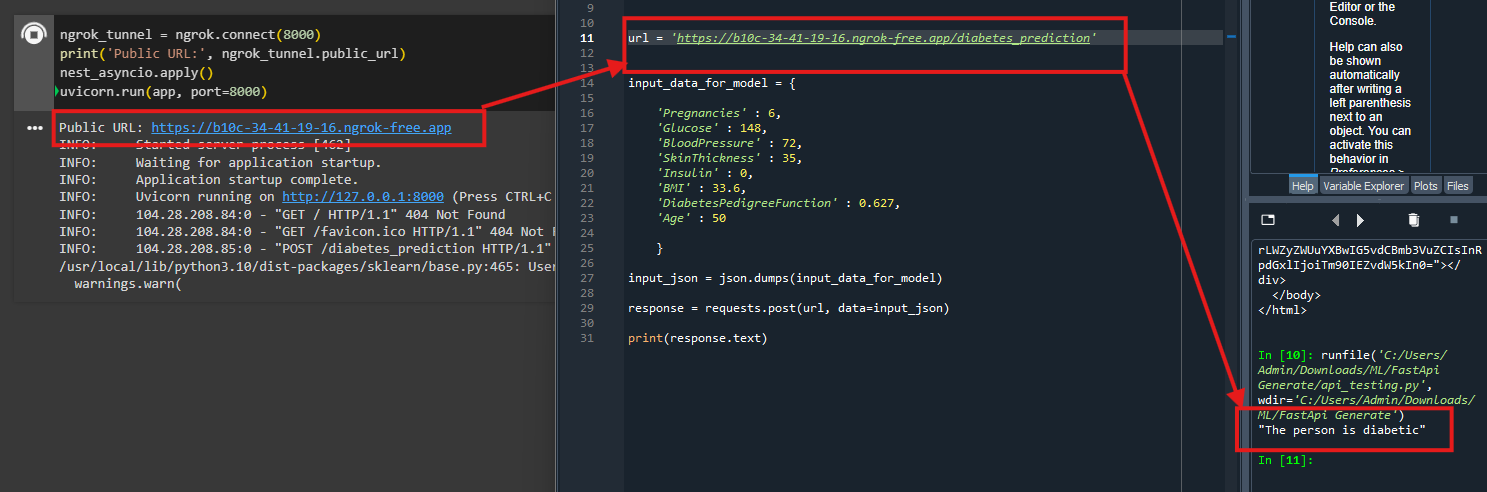

by pasting the public url in the api_testing.py, we can get the same result as before but we can access this public link form anywhere.